# An introduction to Jupyter notebooks and Pandas

A Jupyter notebook (formally iPython) is an interactive environment for Python, and it's probably the best way of using Python for data manipulation.  You may ask: "I can just run python interactively from the terminal, why do I need jupyter?"  Well, that's a fair question, and the answer will hopefully become clear as we work through this notebook.

Jupyter notebooks are broken down into **cells**.  We're in the topmost cell of this notebook at the moment.  Cells come in three flavors:

* **Markdown cells** allows you to edit the text in [Markdown](https://guides.github.com/features/mastering-markdown/).  These cells are used for exposition, discussion, and general formatting.  Think of them as extended comments that can be formatted beautifully, and can contain [links](http://www.jupyter.org), bulleted lists, etc.  Anything that Markdown can!  They can even contain $\LaTeX$ code ([huh?](#footer_latex)): $$\left(\int_1^{\sqrt[3]{3}}z^2 dz \right)\cos\left(\frac{3\pi}{9}\right) = \ln\left(\sqrt[3]{e}\right)$$
* **Code cells** contain code (for us, Python code).  These cells can contain code as short as one line, or as long as you'd like!  (Actually, I have no idea what the maximum length is.  I've had cells well over 200 lines long though).  They have some basic text editor support, so they'll help you with indentation, tab completion, etc., but they won't be able to do some of the magic that true editors like Atom or Sublime can handle.  They're also interactive in the same way that the Python interpretter in interactive mode is.  Type `15*4 %3` and it returns the answer, no need to print out everything.

There's one more, but it's not used as often:

* **Raw cells** are used when you want to hack the notebook to make it fancier.  We won't be using them, but it's good to know they exist.

How about a little demonstation?  Try running the cell below by highlighting it and pressing either `cmd + enter` or `ctrl + enter`.  If that *doesn't* work, then you're not [running the notebook](http://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/execute.html).

In [3]:
def is_prime(n):
    """ Determine whether n is prime."""
    k = 2
    while k*k <= n:
        if n % k == 0:
            return False
        k += 1
    return True

print(*[x for x in range(2,401) if is_prime(x)])

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 101 103 107 109 113 127 131 137 139 149 151 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359 367 373 379 383 389 397


[**Side note** for people confused by that last line](#footer_list_comprehensions)

## Editting a notebook: Command mode and Edit mode

While working with a notebook, you are always in one of two modes.

1. In **Edit mode** you can edit the content of a cell.  It acts like a text file inside a text editor, and has some helpful syntax highlighting.  If you're editing a Markdown cell, it will look significantly different.  If you're editing a code cell, it will look mostly the same.  To *run* the cell, you have a few options:
 * press `command + enter` or `ctrl + enter` to run the cell and exit edit mode.  Running a markdown cell will render it, and running a code cell performs as you expect.
 * press `shift + enter` to run the cell and insert a new cell below.  This is the standard command when you're building the notebook.
 * You can also press `esc` to go to command mode without running the cell.
1. In **Command mode** you have access to your cells in a larger-scale way.  You can press `up` or `down` to move between cells, and press `enter` to enter edit mode on the currently selected cells.  You can also cut, copy, paste, and delete cells with appropriate keyboard commands.  Open the *Command Palette* (the keyboard in the top center of the toolbar) to see all the commands you can use in Command mode.

## Linearity of code: the kernel

A notebook has a **kernel** attached to it.  Think of it as the interactive python running behind the scenes, executing your commands when you send them.  There are two forms of *linearity*, or continuity-of-your-work, going on here, and it can be a bit confusing to new Jupyter users:

* **Kernel Linearity**: After you execute a code cell, it gives you its output and places a number next to the top left corner of the cell.  This number is the *order of cell execution* in the kernel.  It's the order the kernel received from you.  This means you can run cells, tweak them and run them again, run something "below" the cell in the notebook, then come back and run the upper cell, *etc.*, and the kernel will keep track of this in terms of the order in which you ran them **chronologically**.  This is the order you want to keep in mind.  It's really useful!  You can start out with a junky-looking notebook, figure out your data analysis, realize you want to change stuff "in the past", and just go back and change them.  Once you get used to this, you'll love it.
* **Cell Linearity**: There is an obvious order to the cells: the top ones "go first", and the lower ones "go next".  This isn't exactly necessary, though.  It definitely is the goal of the *final product* to go linearly, but programming, and especially data analysis, isn't like writting a journal entry.  Very often, you'll need to go back and change things, then rerun all the cells that come after the one you just edited.  You may type one line in a cell, hit `shift + enter` to see the output and move on to the next cell, then do that three more times.  You then realize that you'd prefer to have done all that at once, and you can merge those three cells together.  It's a workflow that I hope you'll learn to love.

Play around with it now: we first use an uninitialized variable `my_hat` in a cell; hit `shift + enter` to see the error.  Below that, we create a cell in which we give the variable a value, then run that cell, followed by the original cell: 

In [3]:
# Push shift+enter to see an error or esc to not run the cell:

print(my_hat)

Oh, now it works!


In [2]:
my_hat = "Oh, now it works!"

# run this cell, then run the above cell!

You'll get the hang of it in time. Another way this can bite you is by rerunning the same cell and expecting a certain result:

In [ ]:
# run this cell once!
title = "The Cat in the"

In [ ]:
# run this cell many times!

title += " Hat"
print(title)

One other thing to note about jupyter notebooks is that, unlike the Python interpretter, you have full access to your shell (bash or cmd, most likely) by using the `!` operator:

In [ ]:
!echo "Hello from a text file!" > hello.txt

In [ ]:
## Let's see the file we just made:

# I'm on a windows machine as I make this notebook, so I'll use: 
!dir 

# But if you're on a *nix machine (such as a macbook) you should use: 
# !ls

In [ ]:
# If there's no `!`, then we're using Python.  Here's the
# Python command to open the text file we just made:
with open("hello.txt") as f:
    print(f.read())

In [ ]:
# Again, the windows commands: 
!del hello.txt

# But if you're on a *nix machine you should use: 
# !rm hello.txt

(You can now go run the above `!dir` or `!ls` cell to double check that the file is gone!  Remember, *kernel linearity* is the imporant thing to keep in mind.)  I mostly use `!` in order to `!pip install <whatever_python_library_I_need>`.  (What's [pip](https://pythonprogramming.net/using-pip-install-for-python-modules/)?) 

Now let's move on to something more interesting.

# A basic data analysis

In [5]:
# standard import statements for data analysis
import numpy as np                  # linear algebra library
import pandas as pd                 # data analysis and manipulation
import matplotlib.pyplot as plt     # standard-issue plotting library
import seaborn as sns               # fancier plotting library

# other helpful libraries
import requests                     # allows the use of HTTP requests
from io import StringIO             # turns a string into an input stream so that pandas can load it.
from os.path import join            # allows for operating-system-specific path joining

# The following line is a Jupyter "magic": lines beginning with a `%` are how you talk to Jupyter 
#   (instead of Python or the shell) .  Here, I'm telling Jupyter to display matplotlib plots 
#   as inline, as opposed to the default of having them pop up in their own window, buried 
#   behind everything else.
%matplotlib inline

# Use the Requests library to pull a dataset from the internet
response = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

# Get just the data 
data_string = response.text

print(response.text[:279])

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


What a mess!  Let's turn that into something a bit more manageable.  Enter pandas:

In [7]:
# `df` is short for dataframe, the standard object in Pandas (which we abbreviated as `pd`), the Python 
#    dataset manipulation library.  Think of it as Excel, but awesome.
df = pd.read_csv(StringIO(data_string))

# show me the top 5 rows!
df.head()

5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa

Okay, it's prettier, but the columns are all messed up.  What gives?  Pandas figures that your first row is the names of the columns.  We'll add an extra line to fix that.

In [8]:
column_names = ["sepal length", "sepal width", "petal length", "petal width", "species"]

# read it in again to not lose the first line of data:
df = pd.read_csv(StringIO(data_string), names=column_names)
df.head()

sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Awesome, now this is a working dataset.  Let's do some basic checks on our data, just to see what we're working with.

(By the way, a quick *meta note*: notice that I'm using these markdown cells to walk you through the process of my data analysis using this notebook.  It's **much** nicer to look through someone else's work and see what they've done when they tell you a bit of a story with their Markdown cells along the way!)

## Basic pandas commands: data inspection

In [9]:
# number of rows and columns
df.shape

(150, 5)

Notice that in our little `df.head()` call above, all the entries for `species` were the same.  That suggests there aren't too many *unique* options for `species` (In this case, `species` is *categorical data*: it doesn't really have any ordering).  How many unique options are there?

In [10]:
df['species'].unique()

# note that I could have also said:
# df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

This dataset is the famous [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset.  It contains data on  three species of iris, with four interesting columns of data about them.  You can use this dataset to learn about plotting, making basic machine learning models, etc.  Let's continue to analyze it.

In [11]:
# get some useful statistics on the dataset
df.describe()

sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

This tells you quite a bit about the dataset, if you understand what you're looking at.  `count` is the number of elements, `mean` is the mean of the data (note that this requires doing some math on the data, so it will often be messed up if you have an error in your dataset, like missing data), `std` is the standard deviation, and the rest are [percentiles](https://en.wikipedia.org/wiki/Percentile). From this, I can see that nothing looks our of place, like there are unlikely to be incorrect values ($-150$cm long petals, for example), so we're okay to move on to some *exploratory* plots of our data.

# Basic plotting
As I mentioned above, Matplotlib is the standard plotting library for Python. Let's make a simple scatter plot of two of the columns, to start.

In [12]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'species'],
      dtype='object')

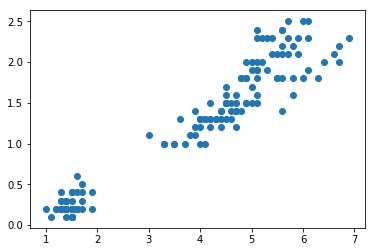

In [13]:
# Note: the semi-colon is optional and makes the output slightly prettier.
plt.scatter(df['petal length'], df['petal width']);

Okay, cool, that was pretty easy.  However, it's not currently telling me much about that important-seeming lower left chunk of data points.  Is it maybe just one species, and the upper bit is the other two?  We can add some color to our plot to test this hypothesis.  To do that, we need to feed a list of colors that's the same length as the data (a length-150 list of strings like `"red", "blue"`, *etc.*) based on the species.  We'll make a Python dictionary to do that:

In [14]:
color_options = ["red", "blue", "green"]

# overly fancy for this example, but very useful when you have tons of categories in your variable!
color_mapping = {species: color for species, color in zip(df['species'].unique(), color_options)}

colors = [color_mapping[species] for species in df['species']]

print(*colors, sep = ", ")

red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, blue, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green


That's a pretty long and ugly printout.  I usually wouldn't leave that in the notebook, but I'm showing you what we're creating.

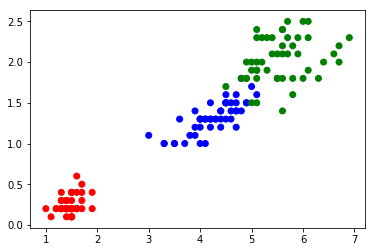

In [15]:
plt.scatter(df['petal length'], df['petal width'], c=colors);

Our hypothesis was correct!  Awesome!  But, which species does this single out?  "The red one" is a pretty unacceptable answer; we need a legend!  Here's a first guess: the matplotlib documentation says that `plt.legend` needs "labels", whatever that is.

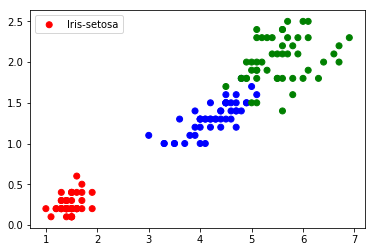

In [16]:
plt.scatter(df['petal length'], df['petal width'], c=colors)
plt.legend(labels=df['species'].unique());

That's... not right, and a bit silly.  It turns out that in order to do this with basic matplotlib, we actually have to split our data up based on its species (category).  (You're probably thinking "Wait, really? That's a silly way to do it!", and you wouldn't be wrong.  Stay with me!)

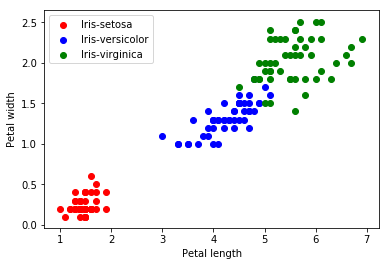

In [17]:
for species in df['species'].unique():
    # Restrict the dataset to just those rows that are this species
    df_restricted = df.loc[df['species'] == species]
    
    # Note that you can also just put in a single color to the `c` option:
    plt.scatter(df_restricted['petal length'], 
                df_restricted['petal width'], 
                label=species,                  # This allows the legend to work
                c=color_mapping[species])

# Since we labeled the individual calls to `plt.scatter`, we can just use:
plt.legend()

# Always label your axes!
plt.xlabel('Petal length')
plt.ylabel('Petal width');

Okay, *that's* a nice graph.  But it sure was a decent amount of work to get it!  The library Seaborn (which is just a wrapper around Matplotlib with a bunch of convenience functions) has some helpful tools to get us this very straightforward graph more quickly:

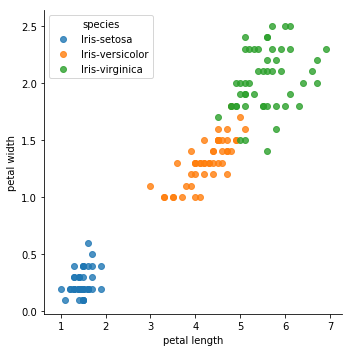

In [18]:
sns.lmplot('petal length', 
           'petal width', 
           data=df, 
           hue='species',       # color the data by the 'species' column
           fit_reg=False,       # don't bother fitting a linear regression line
           legend_out=False);   # place the legend inside the graph, not outside

One last **awesomely useful** plot that Seaborn can make for you, especially for machine learning applications, is called a [pair plot](https://www.quora.com/What-are-pair-plots).  It compares all the different columns/variables against each other using scatter plots, and then plots histograms along the "diagonal", where the "row" and "column" variables of the plot are the same.

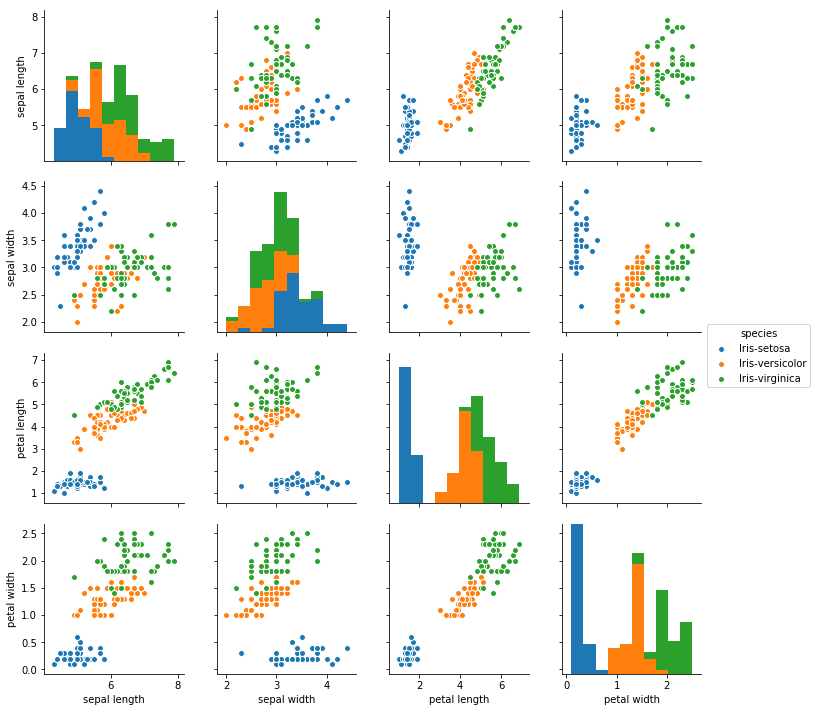

In [19]:
sns.pairplot(df, hue='species');

# Dealing with messy data

Pandas is also really good at helping you if you have messy data.  The iris dataset that we've been working with is *famously* a clean, perfect dataset.  However, most are not, and certainly not the ones that you construct yourself.

In the Fall of 2016, I surveyed my students for a Data Mining course regarding which datasets they might be interested in using.  I then tabulated this data and shared it with them.  We used it to introduce Pandas to the class.  Let's revisit it now, since it's such a great example of messy data!  I've changed it in two ways:

1. I removed the names and slightly anonymized the data.
1. I artifically made it slightly messier so that we can see a few more common data cleaning steps.

<!-- Small side note: notice I used "1." for both items and it updated automatically.  That's the beauty of markdown!  

By the way, if you're reading this, you've entered edit mode for this cell.  I wanted to call attention to the thing above, but only if you can see it, so I wanted to add THIS text only if you're in edit mode.  How is this possible?  Well, markdown is secretly just pre-processed HTML, and this text is inside of an HTML comment, so that's why you can't see it in the final version of the cell.  The more you know! -->

In [25]:
# make sure the file `raw_fall_2016_survey_data.csv` is in a subdirectory of this
# directory called "data".

df = pd.read_csv(join("data", "raw_fall_2016_survey_data.csv"))

Here we used [`os.path.join`](https://docs.python.org/2/library/os.path.html#os.path.join) to make sure that the file opens no matter which operating system you are using, dear reader.

In [21]:
df.head()

Unnamed: 0  Period                Dream Job      Club 1           Club 2  \
0           0       7                      CEO      makers      techmasters   
1           1       5                      NaN      debate  investment club   
2           2       7  JPL operations engineer      makers        astronomy   
3           3       5               Google R&D    robotics      techmasters   
4           4       7        tech entrepreneur  phillipian      techmasters   

           Club 3  Tweets  LHC  VLA  MRI   ...     psychological  books  \
0            band       3    5  5.0    4   ...                 2      4   
1   aviation club       5    2  4.0    3   ...                 5      2   
2      mock trial       1    4  5.0    3   ...                 1      1   
3          german       2    3  4.8    2   ...                 1      4   
4  astronomy club       5    2  5.0    2   ...                 3      4   

   delivery logs  county vote  temperatures  wireless str  \
0              3            3             2           4.0   
1              4            4             2           1.0   
2              4            4             2           2.0   
3              3            4             2           3.5   
4              3            3             4           3.0   

                    Others1  Others2  Others3  Others4  
0                       NaN      NaN      NaN      NaN  
1  body language during ASM      NaN      NaN      NaN  
2                       NaN      NaN      NaN      NaN  
3      radio interpretation      NaN      NaN      NaN  
4                       NaN      NaN      NaN      NaN  

[5 rows x 32 columns]

Hm, that first column looks useless to me, like the csv has an index built in as a column, but I already have one.  Let's reload the dataset with that in mind:

In [22]:
df = pd.read_csv(join("data", "raw_fall_2016_survey_data.csv"), index_col=0)
df.head()

Period                Dream Job      Club 1           Club 2  \
0       7                      CEO      makers      techmasters   
1       5                      NaN      debate  investment club   
2       7  JPL operations engineer      makers        astronomy   
3       5               Google R&D    robotics      techmasters   
4       7        tech entrepreneur  phillipian      techmasters   

           Club 3  Tweets  LHC  VLA  MRI  Seis   ...     psychological  books  \
0            band       3    5  5.0    4     4   ...                 2      4   
1   aviation club       5    2  4.0    3     2   ...                 5      2   
2      mock trial       1    4  5.0    3     3   ...                 1      1   
3          german       2    3  4.8    2     2   ...                 1      4   
4  astronomy club       5    2  5.0    2     3   ...                 3      4   

   delivery logs  county vote  temperatures  wireless str  \
0              3            3             2           4.0   
1              4            4             2           1.0   
2              4            4             2           2.0   
3              3            4             2           3.5   
4              3            3             4           3.0   

                    Others1  Others2  Others3  Others4  
0                       NaN      NaN      NaN      NaN  
1  body language during ASM      NaN      NaN      NaN  
2                       NaN      NaN      NaN      NaN  
3      radio interpretation      NaN      NaN      NaN  
4                       NaN      NaN      NaN      NaN  

[5 rows x 31 columns]

Great, now I see a "`...`" in there, because there are too many columns to view them all.  What are they?

In [23]:
print(*df.columns, sep=', ')

Period, Dream Job, Club 1,  Club 2, Club 3, Tweets, LHC, VLA, MRI, Seis, Water Samples, Emails, Social Network, animal image, instagram, handwritten, martian landscape, sport, HTML, interview, web-ad, psychological, books, delivery logs, county vote, temperatures, wireless str, Others1, Others2, Others3, Others4


Okay, so my dataset comes from the students' dream job, their clubs, and their rating of all the datasets I offered them as options.  Cool.  

I see a few problems here:

1. People didn't call all the clubs the same thing, and 
2. It has missing data.

The problem of what to do with [missing data](https://en.wikipedia.org/wiki/Missing_data) is a *huge* one, and entire branches of statistics have been set up to deal with it.  We'll get to it in a bit.

One thing you could say, by the way, is that we're going to "tidy" the dataset.  The term [tidy data](https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf) means something very specific, and is a good, industry standard goal to work toward in your data cleaning process.

Okay, time to get our hands dirty:

### Cleaning up clubs:

The first thing we need to do is get a handle on the issue.  Let's take a look at just the three "club" columns, they were the three slots on the survey that I had for students to enter the clubs in which they participate.  We can slice the dataset like so:

In [26]:
# We can access the three columns like this.
df[["Club 1", "Club 2", "Club 3"]].head(15)

KeyError: "['Club 2'] not in index"

If you're following along at home exactly the way I hope you are, you should have just gotten an error:

```
KeyError: "['Club 2'] not in index"
```

That seems strange, because when I did `df.columns`, I saw it there.  Let's take a closer look:

In [27]:
print(*[column_name for column_name in df.columns if "Club" in column_name], sep='\n')

Club 1
 Club 2
Club 3


Oh, hm.  That column looks like it has an extra space in it.  Let's fix that, and any other weirdly-spaced columns along the way:

In [28]:
# the function <my_string>.strip() is what you're looking for here:
"       \t   \t \t No more beginning or ending spaces!       ".strip()

'No more beginning or ending spaces!'

In [29]:
df.columns = [column.strip() for column in df.columns]
print(*[column for column in df.columns if "Club" in column], sep='\n')

Club 1
Club 2
Club 3


Okay, that's good to go.  But you know what, I don't really like the fact that there are *any* spaces in the column names, including separating words.  Why?  First of all, it's non-standard.  Second of all:

In [30]:
# Notice that the column named `Period` has no spaces in its name.  This allows me to say:
print(df.Period.unique()) # unique() just collects the unique items from that column (or any list)

[7 5]


(Okay, so I had two sections of that class.)  If I wanted to do the same thing with another column, like `"wireless str"`, I would need to do:

In [31]:
print(df["wireless str"].unique())

[ 4.   1.   2.   3.5  3.   5. ]


Which is a little uglier.  So, let's *CamelCase* it!

In [32]:
df.columns = [col.title().replace(" ", "") if " " in col else col for col in df.columns]

print(*df.columns, sep=', ')

Unnamed:0, Period, DreamJob, Club1, Club2, Club3, Tweets, LHC, VLA, MRI, Seis, WaterSamples, Emails, SocialNetwork, AnimalImage, instagram, handwritten, MartianLandscape, sport, HTML, interview, web-ad, psychological, books, DeliveryLogs, CountyVote, temperatures, WirelessStr, Others1, Others2, Others3, Others4


Awesome.  

#### Back to clubs

Now let's try that original command regarding the clubs again.  Note that in order to perform a [slice](https://pandas.pydata.org/pandas-docs/stable/indexing.html) of the data involving multiple columns, you need to give the indexing command `df[<blah>]` a list of column names, hence the double brackets `[[...]]`.

In [33]:
df[["Club1", "Club2", "Club3"]].head(15)

Club1            Club2              Club3
0               makers      techmasters               band
1               debate  investment club      aviation club
2               makers        astronomy         mock trial
3             robotics      techmasters             german
4           phillipian      techmasters     astronomy club
5         philo/debate         model UN  Democracy project
6              cs club             filo       movie makers
7    economics society   big ideas club         phillipian
8             robotics          cs club        techmasters
9             robotics        ecoaction                NaN
10            robotics      techmasters             gaming
11         techmasters          cs club                NaN
12                WOFO              GSA                NaN
13  international club       SLAM/dance    out of the blue
14             cs club             band         peer tutor

Interesting.  Let's make a list of all clubs.  By the way, the "NaN" columns stand for [not a number](https://en.wikipedia.org/wiki/NaN); they indicate missing data.  In this situation, it's because that student didn't report three clubs.

In [ ]:
club_columns = ["Club1", "Club2", "Club3"]

clubs = []

# This is sort of an ugly way to grab all these clubs.  There are many other options!
for _, club in df[club_columns].iterrows():
    clubs.extend([club[i] for i in range(3) if pd.notnull(club[i]) and club[i] not in clubs])

In [ ]:
print(*sorted(clubs), sep = ', ')

Okay, there are a few ways to deal with this.  Here are the two extremes:

* **Group the ones obviously referring to the same clubs, then create indicator columns for each club**.  An *indicator column* is just a 1 or 0 based on whether a given student is in the given club.  This has quite an obvious, important benefit:  You keep all of the *signal* (information) contained in the dataset, and so that might be helpful for us in our analysis.  However, it has the effect of greatly increasing the "width" of your dataset (the number of "columns", or "predictors", or "variables"), which may make the dataset intractible.  With a dataset of this tiny size, I'm not too concerned about that.  The other potential issue is that you're not taking into effect that some of these clubs are very similar to each other, and some are very different.  By making these indicators weighted the same, you may be capturing a great deal of *noise*, a word meaning the random fluctuations that comes from data.  This is sometimes called *one-hotting*.
* **Create two classes of clubs, based on something you may think is relevant.**  For example, I may make "techy" clubs and "non-techy" clubs.  This has the benefit of not having as much noise, but it also loses some signal.  This is often called *binning*.

What you choose is up to you, and it's mostly a matter of how much time you have to go through all the ways of modeling your data.  You could have the motto of "always try everything", and that may work out for you in terms of getting the best analysis.  Or you may just want a "good enough" result, and roll with it.  There's really no right or wrong answer; it's really a matter of how much time you want to spend with this particular dataset and how much noise you can tolerate.

For now, I'll take a middle ground, and I'll hard code these into a few groups.  It's still binning, but I'll use 6 bins instead of 2.  There really isn't that much easier of a way to do this without signicant natural language processing.

In [ ]:
club_groups = {'philo/poli/econ': ['model UN','philo/debate', 'investment club','Democracy project',
                                   'economics society','mock trial','debate','filo'],
               'social': ['out of the blue', 'ecoaction','GSA','WOFO','SLAM/dance',
                          'quiz bowl','band','movie makers'],
               'PA duties' : ['tour guide','student activities','phillipian','peer tutor'],
               'international': ['german', 'indopak','international club',],
               'math/sci/tech': ['gaming', 'astronomy club','math','blue moon (sci)',
                                 'cs club','techmasters','makers','astronomy','aviation club',
                                 'chess','robotics'],
               'entreprenuerial': ['big ideas club', 'tang', 'entrpreneurs club']}

for group, clubs in club_groups.items():
    df[group] = df[club_columns].isin(clubs).sum(axis=1)

In [ ]:
df.head() # Scroll way to the right to see our work!

### Cleaning up Dream jobs

Same story for these.

In [ ]:
dream_jobs = []

for job in df['DreamJob']:
    if pd.notnull(job): 
        dream_jobs.append(job)

In [ ]:
job_groups = {'jobs_tech':['Google R&D', 'tech entrepreneur','Developer'],
              'jobs_science': ['biomedical engineer','math-related','research scientist', 
                          'JPL operations engineer','neuroscientist'],
              'jobs_business': ['CEO', 'product manager','venture capital',],
              'jobs_fantastic': ['rollerskating waitress']}

In [ ]:
for group in job_groups:
    df[group] = df.DreamJob.isin(job_groups[group]).apply(lambda x: {False:0, True:1}[x])

df.head(15) #scroll way right one more time!

### Final Cleanup: create data matrix

The last step is to remove all string columns, creating just a [matrix](https://en.wikipedia.org/wiki/Matrix_%28mathematics%29).  Let's inspect the data types (or `dtypes`) of the columns:

In [ ]:
df.dtypes[:15]

Okay, so we can filter the columns by their `dtypes`.  You might think that this will be a huge task of typing in each column name that has type `object` in it, but of course there's tools to make your life easier:

In [ ]:
X = df.select_dtypes(exclude=['object'])

X.head()

When you're done cleaning a dataset, it's usually good to save the data to a **new** file.  It's very important that it's new, to help with [data lineage/provenance](https://en.wikipedia.org/wiki/Data_lineage).

In [ ]:
X.to_csv(join("data","dataset_preferences.csv"))

# This way, if screw up something below and lose some data, you can always uncomment this:
#X = pd.read_csv(join("data","dataset_preferences.csv"))

## Analysis

The point of this notebook isn't to dive deeply into the analysis, so we'll just do one last little bit to show that we're ready to dive into more mathematical/statistical techniques.  The first thing we want to do is see if we have some missing data.

The way we're going to zero in on it is to use what's called *boolean slicing*.  We can give a boolean expression to the slicing operator of a dataframe (that's `X[<...>]`).

In [ ]:
X[X.isnull().any(axis=1)] # Which rows have NaN?

In [ ]:
X.columns[pd.isnull(X).any()].tolist() # Which columns have NaN?

The topic of what to do with missing data is a big one, and not something we can cover in a single cell.  The simplest solution is to [*impute*](https://en.wikipedia.org/wiki/Imputation_%28statistics%29) them to be some kind of average or otherwise representative value.  Here, I'll take the median of the column.  

One important side note: when we use `df[<my_command>]` to slice up the dataset, we're getting back what's called a *view*; it's not the original data.  That is, `X` strictly speaking is **not** precisely some of the columns of `df`.  Therefore,  setting individual values in a dataframe can sometimes be strange if we've done any of those slices (and we have!).  Pandas will yell at you with a warning about this, though for something this simple it will probably work just fine.

In [ ]:
# This one will (probably!) work but will (probably!) raise a warning:
X.loc[18,"WaterSamples"] = X["WaterSamples"].median()

The warning is happening because Pandas can't guarantee that it's done what you've asked it. In order to be sure that you've got a fully functioning `DataFrame` object, first make it so:

In [ ]:
X = pd.DataFrame(X)

# Look, no warnings!
X.loc[18,"SocialNetwork"] = X["SocialNetwork"].median()
X.loc[18,"MartianLandscape"] = X["MartianLandscape"].median()

Okay, let's take a look to see that it did indeed all work.

In [ ]:
X[X.isnull().any(axis=1)]

Great.  Now, of all those different datasets, which ones scored the highest (as in, which ones did students want to work with the most)?  We need to find a way to select those rows that correspond to jobs.  It would be a lot of work to type them all out!  Is there anything else we can use?

In [ ]:
not_datasets = list(club_groups.keys()) + list(job_groups.keys()) + ["Period"]
datasets = [col for col in X.columns if col not in not_datasets]
print(*datasets, sep=", ")

That worked!  Now let's see them all.

In [ ]:
totals = X[datasets].sum(axis=0).sort_values()
plt.figure(figsize=(10, 8))
totals.plot(kind='barh');

Interesting!  I wasn't expecting emails to win.  Or really any of those top 5 or so.  The last thing we'll do with this elementary analysis is to look at basic statistics of the dataset.

In [ ]:
X.describe()

There's so, so, so much more we can do with this dataset, now that we have it in a form we want!

### footer_latex
$\LaTeX$ is the *de facto* standard tool for typesetting mathematics and all things based upon in (*e.g.* science).  You separate your mathematical code using dollar signs, as you saw me do up there.  By the way, the math in that example above was both correct and adorable (Can you tell me why?).

### footer_list_comprehensions
What does that `print` statement above mean? Well, let's start with something easier:
```
>>> [x for x in range(2, 401)]
```
This is equal to [2, 3, 4, ..., 400] (a list!).  This is called a [list comprehension](https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions).
```
>>> [x for x in range(2, 401) if is_prime(x)]
```
This is all the primes between 2 and 400
```
>>> print(*[<that_command_above>])
```
The asterisk is sometimes called the *splat operator*, it "unpacks" the list.  Thus, `my_func(*[2,3,4])` is equivalent to `my_func(2,3,4)`.